In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Create the haar cascade
faceCascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_mcs_mouth.xml')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") #Note the change
mouth_cascade = cv2.CascadeClassifier('/content/haarcascade_mcs_mouth.xml')

In [ ]:
# Read the image
image = cv2.imread('')
print('original image')
cv2_imshow(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print('Gray image')
cv2_imshow(gray)


SyntaxError: ignored

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction (dia,pix col,pix)
RGB =(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
print('RGB Image ')
cv2_imshow(RGB)


NameError: ignored

# New Section

In [ ]:
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
    
)


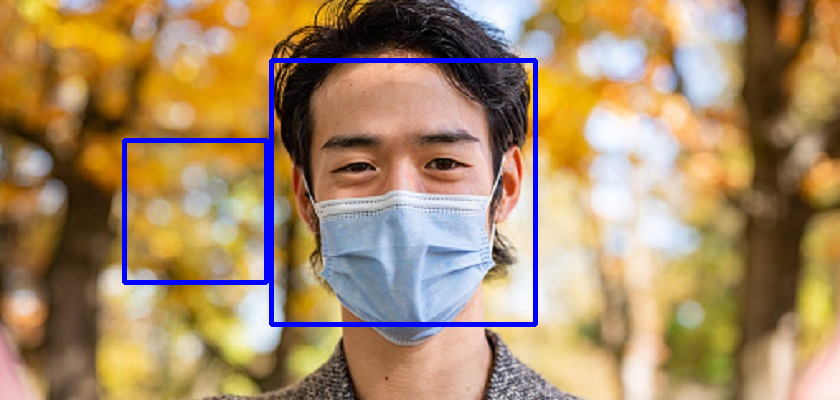

-1

In [ ]:
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 3)
#display output
cv2_imshow(image)
cv2.waitKey()

In [ ]:
bw_threshold = 80
font = cv2.FONT_HERSHEY_SIMPLEX
org = (30, 30)
weared_mask_font_color = (0, 255, 0)
not_weared_mask_font_color = (0, 0, 255)
thickness = 1
font_scale = 1
weared_mask = "wearing mask"
not_weared_mask = "not wearing mask"

In [ ]:
(thresh, black_and_white) = cv2.threshold(gray, bw_threshold, 255, cv2.THRESH_BINARY)
faces_bw = face_cascade.detectMultiScale(black_and_white, 1.1, 4)

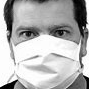

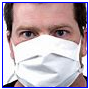

In [ ]:
if(len(faces) == 0 and len(faces_bw) == 0):
        cv2.putText(image, "No face found...", org, font, font_scale, weared_mask_font_color, thickness, cv2.LINE_AA)
else:
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 255), 2)
            roi_gray = gray[y:y + h, x:x + w]
            cv2_imshow(roi_gray)
            roi_color = image[y:y + h, x:x + w]
            cv2_imshow(roi_color)
            mouth_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_smile.xml")
           

            mouth_rects = mouth_cascade.detectMultiScale(gray,1.7,11) 
            

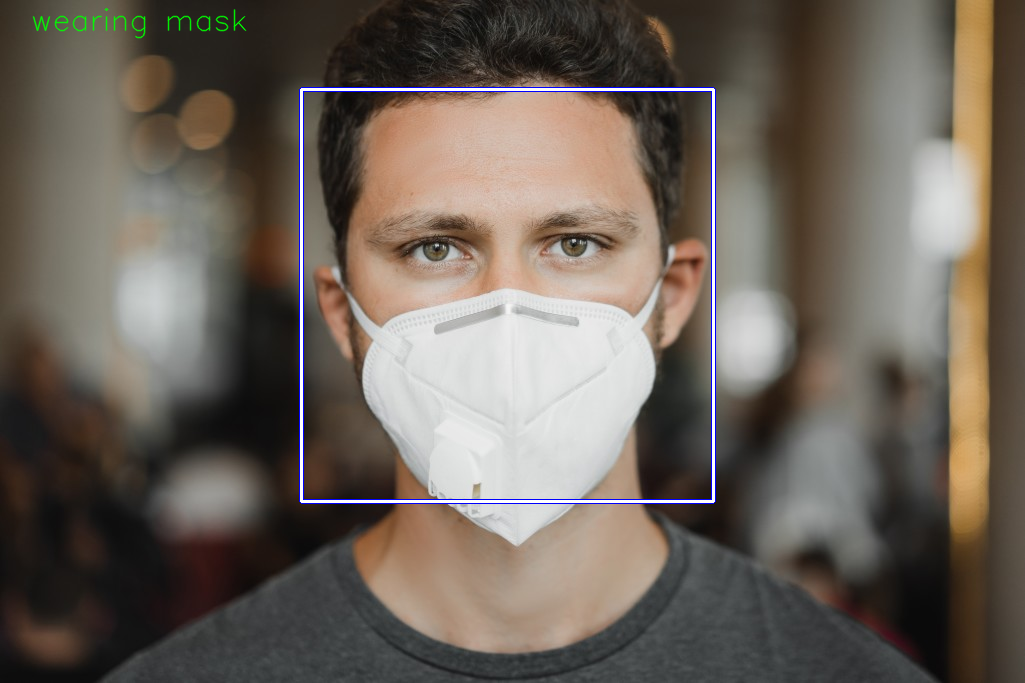

In [ ]:
if(len(mouth_rects) == 0):
            cv2.putText(image, weared_mask, org, font, font_scale, weared_mask_font_color, thickness, cv2.LINE_AA)
else:
            for (mx, my, mw, mh) in mouth_rects:
                if(y < my < y + h):
                    cv2.putText(image, not_weared_mask, org, font, font_scale, not_weared_mask_font_color, thickness, cv2.LINE_AA)
                    break
cv2_imshow(image)